In [2]:
import pandas as pd

In [99]:
def read_vcf(vcf_path):
    df = pd.read_csv(vcf_path, comment='#', sep='\t', header=None, names=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE'])
    return df

In [100]:
# I need to make sure the nist vcf file has END column. The SVs are not visualized correctly without END in IGV.
nist_dipcall_del_hg38_vcf = read_vcf('/Users/gaoyueya/Documents/Projects/TAG-Ticket1789/HG2T2T_v1/GRCh38_HG2-T2TQ100-V1.0_dipcall_passDEL.vcf')
nist_dipcall_del_hg38_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr1,126241,.,ATAATGGGAGAATGTTGAAAACTCAGAGAGAAGAGCAACTCTCACA...,A,30,PASS,SVTYPE=DEL;SVLEN=38630;LCR=0.997927,GT:AD,"1|1:0,2"
1,chr1,180102,.,CCCTAACCCCTAATCCTAACCCTAATCCTAACCCTAACCCTAACCC...,C,30,PASS,TRF;TRFdiff=-146.7;TRFrepeat=ACCCTA;TRFovl=1;T...,GT:AD,"1|1:0,2"
2,chr1,934064,.,AGGGGAGGCGGCTGCGTTACAGGTGGGCAGGGGAGGCGGCTCCGTT...,A,30,PASS,SVTYPE=DEL;SVLEN=840;LCR=0.846332,GT:AD,"1|1:0,2"
3,chr1,1288543,.,TCCGTCCCCCGTGTCTCTGCTCCGTCCCCCGTGTCTCTGCTCCGTC...,T,30,PASS,TRF;TRFdiff=-42.8;TRFrepeat=CCCGTGTCTCTGCTCCGT...,GT:AD,"0|1:1,1"
4,chr1,1349974,.,TGGGAGGAGTGAGGAGGGGGCCTGGACGGGGCAGGAGCGACGGGGG...,T,30,PASS,SVTYPE=DEL;SVLEN=1080;LCR=0.752907,GT:AD,"1|1:0,2"


In [101]:
# Add the END attribute that is required by IGV visualization
updated_info_field = []
for index, row in nist_dipcall_del_hg38_vcf.iterrows():
    info_list = row['INFO'].split(';')
    svlen= int([i.split('=')[1] for i in info_list if i.startswith('SVLEN=')][0])
    end_pos = row['POS'] + svlen
    # Extend the original info list with three new elements
    info_list.extend([f"END={end_pos}"])
    # Join the list
    updated_info = ';'.join(info_list)
    updated_info_field.append(updated_info)
updated_info_field

['SVTYPE=DEL;SVLEN=38630;LCR=0.997927;END=164871',
 'TRF;TRFdiff=-146.7;TRFrepeat=ACCCTA;TRFovl=1;TRFstart=180088;TRFend=180997;TRFperiod=6;TRFcopies=0.1;TRFscore=1716;TRFentropy=1.58;SVTYPE=DEL;SVLEN=880;RM_score=494;RM_repeat=(CCCTAA)N;RM_clsfam=Simple_repeat;LCR=0.789886;END=180982',
 'SVTYPE=DEL;SVLEN=840;LCR=0.846332;END=934904',
 'TRF;TRFdiff=-42.8;TRFrepeat=CCCGTGTCTCTGCTCCGT;TRFovl=1;TRFstart=1288181;TRFend=1290252;TRFperiod=18;TRFcopies=69;TRFscore=4877;TRFentropy=1.55;SVTYPE=DEL;SVLEN=770;LCR=0.774556;END=1289313',
 'SVTYPE=DEL;SVLEN=1080;LCR=0.752907;END=1351054',
 'TRF;TRFdiff=-17.5;TRFrepeat=GTGTGTACGTGGGTGTTAGGTTGTAGGTACACAC;TRFovl=1;TRFstart=1934205;TRFend=1935601;TRFperiod=34;TRFcopies=24.7;TRFscore=3199;TRFentropy=1.86;SVTYPE=DEL;SVLEN=595;LCR=0.931031;END=1935584',
 'TRF;TRFdiff=-4.6;TRFrepeat=CCCCCAGGTGAGCATCTGACAGCCTGGAGCAGCACCCACA;TRFovl=0.21;TRFstart=2663159;TRFend=2667792;TRFperiod=40;TRFcopies=110.8;TRFscore=8850;TRFentropy=1.89;SVTYPE=DEL;SVLEN=883;LCR=0.9416;E

In [102]:
# Update INFO field
nist_dipcall_del_hg38_vcf['INFO'] = updated_info_field

In [103]:
nist_dipcall_del_hg38_vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr1,126241,.,ATAATGGGAGAATGTTGAAAACTCAGAGAGAAGAGCAACTCTCACA...,A,30,PASS,SVTYPE=DEL;SVLEN=38630;LCR=0.997927;END=164871,GT:AD,"1|1:0,2"
1,chr1,180102,.,CCCTAACCCCTAATCCTAACCCTAATCCTAACCCTAACCCTAACCC...,C,30,PASS,TRF;TRFdiff=-146.7;TRFrepeat=ACCCTA;TRFovl=1;T...,GT:AD,"1|1:0,2"
2,chr1,934064,.,AGGGGAGGCGGCTGCGTTACAGGTGGGCAGGGGAGGCGGCTCCGTT...,A,30,PASS,SVTYPE=DEL;SVLEN=840;LCR=0.846332;END=934904,GT:AD,"1|1:0,2"
3,chr1,1288543,.,TCCGTCCCCCGTGTCTCTGCTCCGTCCCCCGTGTCTCTGCTCCGTC...,T,30,PASS,TRF;TRFdiff=-42.8;TRFrepeat=CCCGTGTCTCTGCTCCGT...,GT:AD,"0|1:1,1"
4,chr1,1349974,.,TGGGAGGAGTGAGGAGGGGGCCTGGACGGGGCAGGAGCGACGGGGG...,T,30,PASS,SVTYPE=DEL;SVLEN=1080;LCR=0.752907;END=1351054,GT:AD,"1|1:0,2"
...,...,...,...,...,...,...,...,...,...,...
1858,chrY,20284058,.,GGTATTGCTCACTTCAAGAATGAAGCTGCAGACCTTAGTGGTGAGT...,G,30,PASS,SVTYPE=DEL;SVLEN=11374;LCR=0.977125;END=20295432,GT:AD,"1|.:0,1"
1859,chrY,20298613,.,CTATGTCCAGAGTTTGTTCCTTCAGATGTGTCCAGAGTTTCTTCCT...,C,30,PASS,TRF;TRFdiff=-20.9;TRFrepeat=GTGTTATGTCCAGAGTTT...,GT:AD,"1|.:0,1"
1860,chrY,21739542,.,CNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,C,30,PASS,SVTYPE=DEL;SVLEN=1816;LCR=0.00337635;END=21741358,GT:AD,"1|.:0,1"
1861,chrY,26095935,.,GAAAAAAAGATGCCTCATCTACAGTGCCTACAGTTATTATCATAGT...,G,30,PASS,SVTYPE=DEL;SVLEN=520;LCR=0.978697;END=26096455,GT:AD,"1|.:0,1"


In [111]:
nist_del_intervals = [f"{row['CHROM']}:{row['POS']}-{row['INFO'].split(';END=')[1]}"for index, row in nist_dipcall_del_hg38_vcf.iterrows()]
nist_dipcall_del_hg38_vcf['interval'] = nist_del_intervals
nist_del_intervals[:5]

['chr1:126241-164871',
 'chr1:180102-180982',
 'chr1:934064-934904',
 'chr1:1288543-1289313',
 'chr1:1349974-1351054']

In [105]:
len(nist_del_intervals)

1863

In [16]:
import importlib
from T2T_ACE.alignment_utilities import load_reference
import T2T_ACE.interval_list_evaluation as IntervalListEvaluation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import T2T_ACE.alignment_visualization_utilities as avu
import T2T_ACE.validator as v
import T2T_ACE.duplication_evaluation as DuplicationEvaluation

In [17]:
# Load Reference Genome
class ReferenceLocations:
        hg002t2t = "/Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta"
        chm13 = "/Users/gaoyueya/Documents/Reference_Genome/chm13v2.0.fa.gz"
        hg38 = "/Users/gaoyueya/Documents/Reference_Genome/GRCh38.primary_assembly.genome.fa" # primary assembly

# Load the minimap2 aligner from reference fasta file
# Load HG002 T2T reference
hg002t2t = load_reference(ReferenceLocations.hg002t2t)
# Load hg38 reference
hg38 = load_reference(ReferenceLocations.hg38)

INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta
INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/GRCh38.primary_assembly.genome.fa


In [106]:
nist_del_sum_df = IntervalListEvaluation.eval_interval_list(nist_del_intervals, ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).classify_list_of_DELs()

chr1:126241-164871
DEL interval: chr1:126241-164871 38631
DEL interval Alignments in hg38: 2
DEL interval Alignments in HG2: 0
flanking_size: 11589, copy_threshold: 2
left flanking interval: chr1:114652-126241, 11590, 3, 2
right flanking interval: chr1:164871-176460, 11590, 4, 0
flanking_size: 12589, copy_threshold: 2
left flanking interval: chr1:113652-126241, 12590, 3, 2
right flanking interval: chr1:164871-177460, 12590, 3, 0
flanking_size: 13589, copy_threshold: 2
left flanking interval: chr1:112652-126241, 13590, 3, 2
right flanking interval: chr1:164871-178460, 13590, 2, 0
flanking_size: 14589, copy_threshold: 2
left flanking interval: chr1:111652-126241, 14590, 3, 2
right flanking interval: chr1:164871-179460, 14590, 1, 0
flanking_size: 15589, copy_threshold: 2
left flanking interval: chr1:110652-126241, 15590, 3, 1
right flanking interval: chr1:164871-180460, 15590, 1, 0
flanking_size: 16589, copy_threshold: 2
left flanking interval: chr1:109652-126241, 16590, 4, 0
right flanki

In [107]:
nist_del_sum_df['major_classification'].value_counts()

major_classification
DEL          1516
False DEL     190
Unknown       157
Name: count, dtype: int64

In [108]:
len(nist_del_sum_df)

1863

In [112]:
genotype_dict = {row['interval']:row['SAMPLE'].split(':')[0] for index, row in nist_dipcall_del_hg38_vcf.iterrows()}
genotype_dict

{'chr1:126241-164871': '1|1',
 'chr1:180102-180982': '1|1',
 'chr1:934064-934904': '1|1',
 'chr1:1288543-1289313': '0|1',
 'chr1:1349974-1351054': '1|1',
 'chr1:1934989-1935584': '1|0',
 'chr1:2662456-2663339': '1|0',
 'chr1:2665980-2668511': '1|0',
 'chr1:2694985-2695628': '0|1',
 'chr1:2696763-2697688': '0|1',
 'chr1:2750145-2750788': '0|1',
 'chr1:2750874-2753403': '0|1',
 'chr1:3299666-3300276': '1|1',
 'chr1:3643863-3644373': '1|1',
 'chr1:4065139-4066241': '0|1',
 'chr1:13004897-13075112': '1|0',
 'chr1:13008067-13025445': '0|1',
 'chr1:13025617-13037973': '0|1',
 'chr1:14110577-14112444': '1|0',
 'chr1:14331214-14331990': '1|0',
 'chr1:16744928-16746692': '0|1',
 'chr1:24478046-24480950': '0|1',
 'chr1:24832196-24835018': '1|1',
 'chr1:26642257-26643325': '1|1',
 'chr1:26643547-26646498': '1|1',
 'chr1:27853406-27853977': '1|1',
 'chr1:30567797-30568812': '0|1',
 'chr1:36958604-36960147': '0|1',
 'chr1:38618549-38620153': '1|0',
 'chr1:43106314-43107075': '0|1',
 'chr1:45710241-

In [114]:
nist_del_sum_df['genotype'] = nist_del_sum_df['del_interval'].map(genotype_dict)

In [115]:
nist_del_sum_df.head()

,del_interval,del_interval_size,flanking_size,left_flanking_interval,right_flanking_interval,left_flanking_hg38_hits,right_flanking_hg38_hits,left_flanking_hg2_hits,right_flanking_hg2_hits,distance_between_flankings,flanking_connection_strand,major_classification,minor_classification,genotype
0,chr1:126241-164871,38631,39589,chr1:86652-126241,chr1:164871-204460,1,1,0,0,[],[],Unknown,Unknown,1|1
1,chr1:180102-180982,881,11000,chr1:169102-180102,chr1:180982-191982,1,2,0,0,[],[],Unknown,Unknown,1|1
2,chr1:934064-934904,841,2000,chr1:932064-934064,chr1:934904-936904,1,1,2,2,"[-1, -1]","[POS, POS]",DEL,Homozygous DEL,1|1
3,chr1:1288543-1289313,771,3000,chr1:1285543-1288543,chr1:1289313-1292313,1,1,2,2,"[2973, -475]","[POS, POS]",DEL,Heterozygous DEL,0|1
4,chr1:1349974-1351054,1081,2000,chr1:1347974-1349974,chr1:1351054-1353054,1,1,2,2,"[-1, -1]","[POS, POS]",DEL,Homozygous DEL,1|1


In [117]:
nist_del_sum_df.to_csv('/Users/gaoyueya/Documents/Projects/TAG-Ticket1789/HG2T2T_v1/T2T-ACE-nist_del_sum_df.csv',index=False)

In [89]:
importlib.reload(v)

<module 'T2T_ACE.validator' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/validator.py'>

In [92]:
nist_del_intervals.index("chr3:92248094-92249111")

283

In [118]:
v.collect_del_flankings("chr1:45710241-45710903", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr1:45710241-45710903 663
DEL interval Alignments in hg38: 3
DEL interval Alignments in HG2: 3
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:45708241-45710241, 2001, 1, 2
right flanking interval: chr1:45710903-45712903, 2001, 1, 2
----------- No DEL Evidence -----------
chr1_PATERNAL:45931952-45933955 (2004bp), chr1_PATERNAL:45936618-45938618 (2001bp), 2662
----------- No DEL Evidence -----------
chr1_MATERNAL:45898056-45900063 (2008bp), chr1_MATERNAL:45902328-45904328 (2001bp), 2264
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr1_PATERNAL:45933558-45934221; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:45933956-45936617; Overlapping:(9.99, 40.06)
DEL HG2 alignment:chr1_PATERNAL:45933164-45933823; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:45933956-45936617; Overlapping:(-4.96, -20.0)
DEL HG2 alignment:chr1_MATERNAL:45899272-45899931; Interval Between HG2 Aligned Flankings:chr1_MATERNAL:4590006

{'del_interval': 'chr1:45710241-45710903',
 'del_interval_size': 663,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr1:45708241-45710241',
 'right_flanking_interval': 'chr1:45710903-45712903',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [2662, 2264],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr1:45710241-45710903',
  'chr1:45708241-45710241',
  'chr1:45710903-45712903'],
 'hg2_plotting_flanking_intervals': ['chr1_PATERNAL:45931952-45933955',
  'chr1_MATERNAL:45898056-45900063',
  'chr1_PATERNAL:45936618-45938618',
  'chr1_MATERNAL:45902328-45904328'],
 'classification': 'False DEL',
 'minor_classification': 'False DEL'}

DEL interval: chr1:45710241-45710903 663
DEL interval Alignments in hg38: 3
DEL interval Alignments in HG2: 3
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:45708241-45710241, 2001, 1, 2
right flanking interval: chr1:45710903-45712903, 2001, 1, 2
----------- No DEL Evidence -----------
chr1_PATERNAL:45931952-45933955 (2004bp), chr1_PATERNAL:45936618-45938618 (2001bp), 2662
----------- No DEL Evidence -----------
chr1_MATERNAL:45898056-45900063 (2008bp), chr1_MATERNAL:45902328-45904328 (2001bp), 2264
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr1_PATERNAL:45933558-45934221; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:45933956-45936617; Overlapping:(9.99, 40.06)
DEL HG2 alignment:chr1_PATERNAL:45933164-45933823; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:45933956-45936617; Overlapping:(-4.96, -20.0)
DEL HG2 alignment:chr1_MATERNAL:45899272-45899931; Interval Between HG2 Aligned Flankings:chr1_MATERNAL:4590006

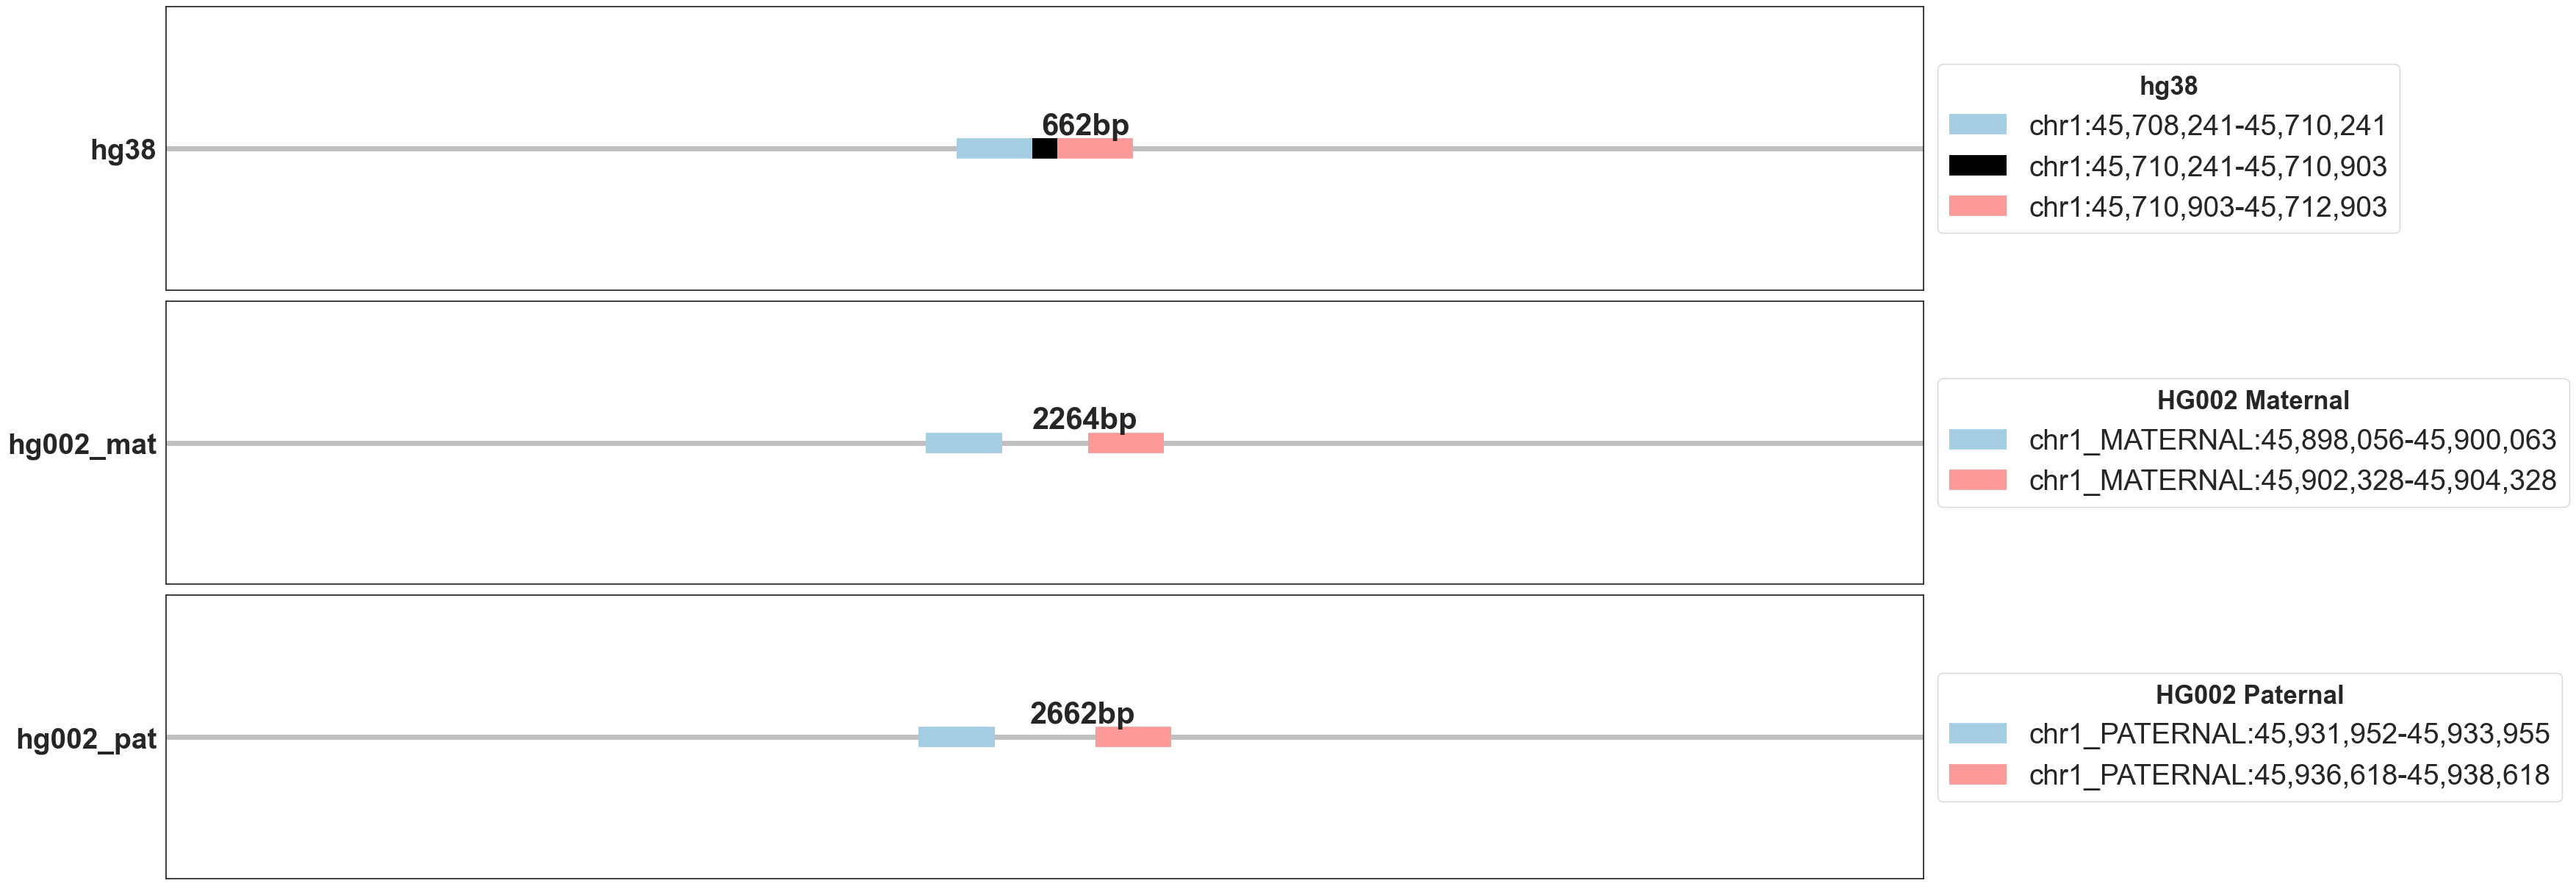

In [119]:
v.plot_del_flankings("chr1:45710241-45710903", ReferenceLocations.hg38, hg38, hg002t2t)

In [120]:
v.collect_del_flankings("chr4:107142040-107154888", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr4:107142040-107154888 12849
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 1
flanking_size: 3854, copy_threshold: 2
left flanking interval: chr4:107138186-107142040, 3855, 1, 2
right flanking interval: chr4:107154888-107158742, 3855, 1, 2
********** Potential DEL **********
chr4_MATERNAL:108520260-108524109 (3850bp), chr4_MATERNAL:108524107-108527961 (3855bp), -3
----------- No DEL Evidence -----------
chr4_PATERNAL:109324423-109328282 (3860bp), chr4_PATERNAL:109341122-109344977 (3856bp), 12839


{'del_interval': 'chr4:107142040-107154888',
 'del_interval_size': 12849,
 'flanking_size': 3854,
 'left_flanking_interval': 'chr4:107138186-107142040',
 'right_flanking_interval': 'chr4:107154888-107158742',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [-3, 12839],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr4:107142040-107154888',
  'chr4:107138186-107142040',
  'chr4:107154888-107158742'],
 'hg2_plotting_flanking_intervals': ['chr4_MATERNAL:108520260-108524109',
  'chr4_PATERNAL:109324423-109328282',
  'chr4_MATERNAL:108524107-108527961',
  'chr4_PATERNAL:109341122-109344977'],
 'classification': 'DEL',
 'minor_classification': 'Heterozygous DEL'}

In [123]:
3854/12849

0.29994552105222194

In [122]:
v.align_interval("chr4:107142040-107154888", ReferenceLocations.hg38, hg38, hg002t2t)

([['chr4:107142039-107154888', 1, 0, 12849]],
 [['chr4_PATERNAL:109328271-109341123', 1, 0, 12849]])

In [129]:
v.collect_del_flankings("chr1:6006003-6006574", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr1:6006003-6006574 572
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 3
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:6004003-6006003, 2001, 1, 2
right flanking interval: chr1:6006574-6008574, 2001, 1, 2
----------- No DEL Evidence -----------
chr1_PATERNAL:5646078-5647916 (1839bp), chr1_PATERNAL:5649095-5651101 (2007bp), 1178
********** Potential DEL **********
chr1_MATERNAL:5681347-5683427 (2081bp), chr1_MATERNAL:5683503-5685516 (2014bp), 75


{'del_interval': 'chr1:6006003-6006574',
 'del_interval_size': 572,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr1:6004003-6006003',
 'right_flanking_interval': 'chr1:6006574-6008574',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [1178, 75],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr1:6006003-6006574',
  'chr1:6004003-6006003',
  'chr1:6006574-6008574'],
 'hg2_plotting_flanking_intervals': ['chr1_PATERNAL:5646078-5647916',
  'chr1_MATERNAL:5681347-5683427',
  'chr1_PATERNAL:5649095-5651101',
  'chr1_MATERNAL:5683503-5685516'],
 'classification': 'DEL',
 'minor_classification': 'Heterozygous DEL'}

In [128]:
v.align_interval("chr1:6006003-6006574", ReferenceLocations.hg38, hg38, hg002t2t)[1]

[['chr1_PATERNAL:5648584-5649170', 1, 0, 572],
 ['chr1_PATERNAL:5648701-5649278', 1, 0, 561],
 ['chr1_PATERNAL:5648662-5649278', 1, 0, 561]]

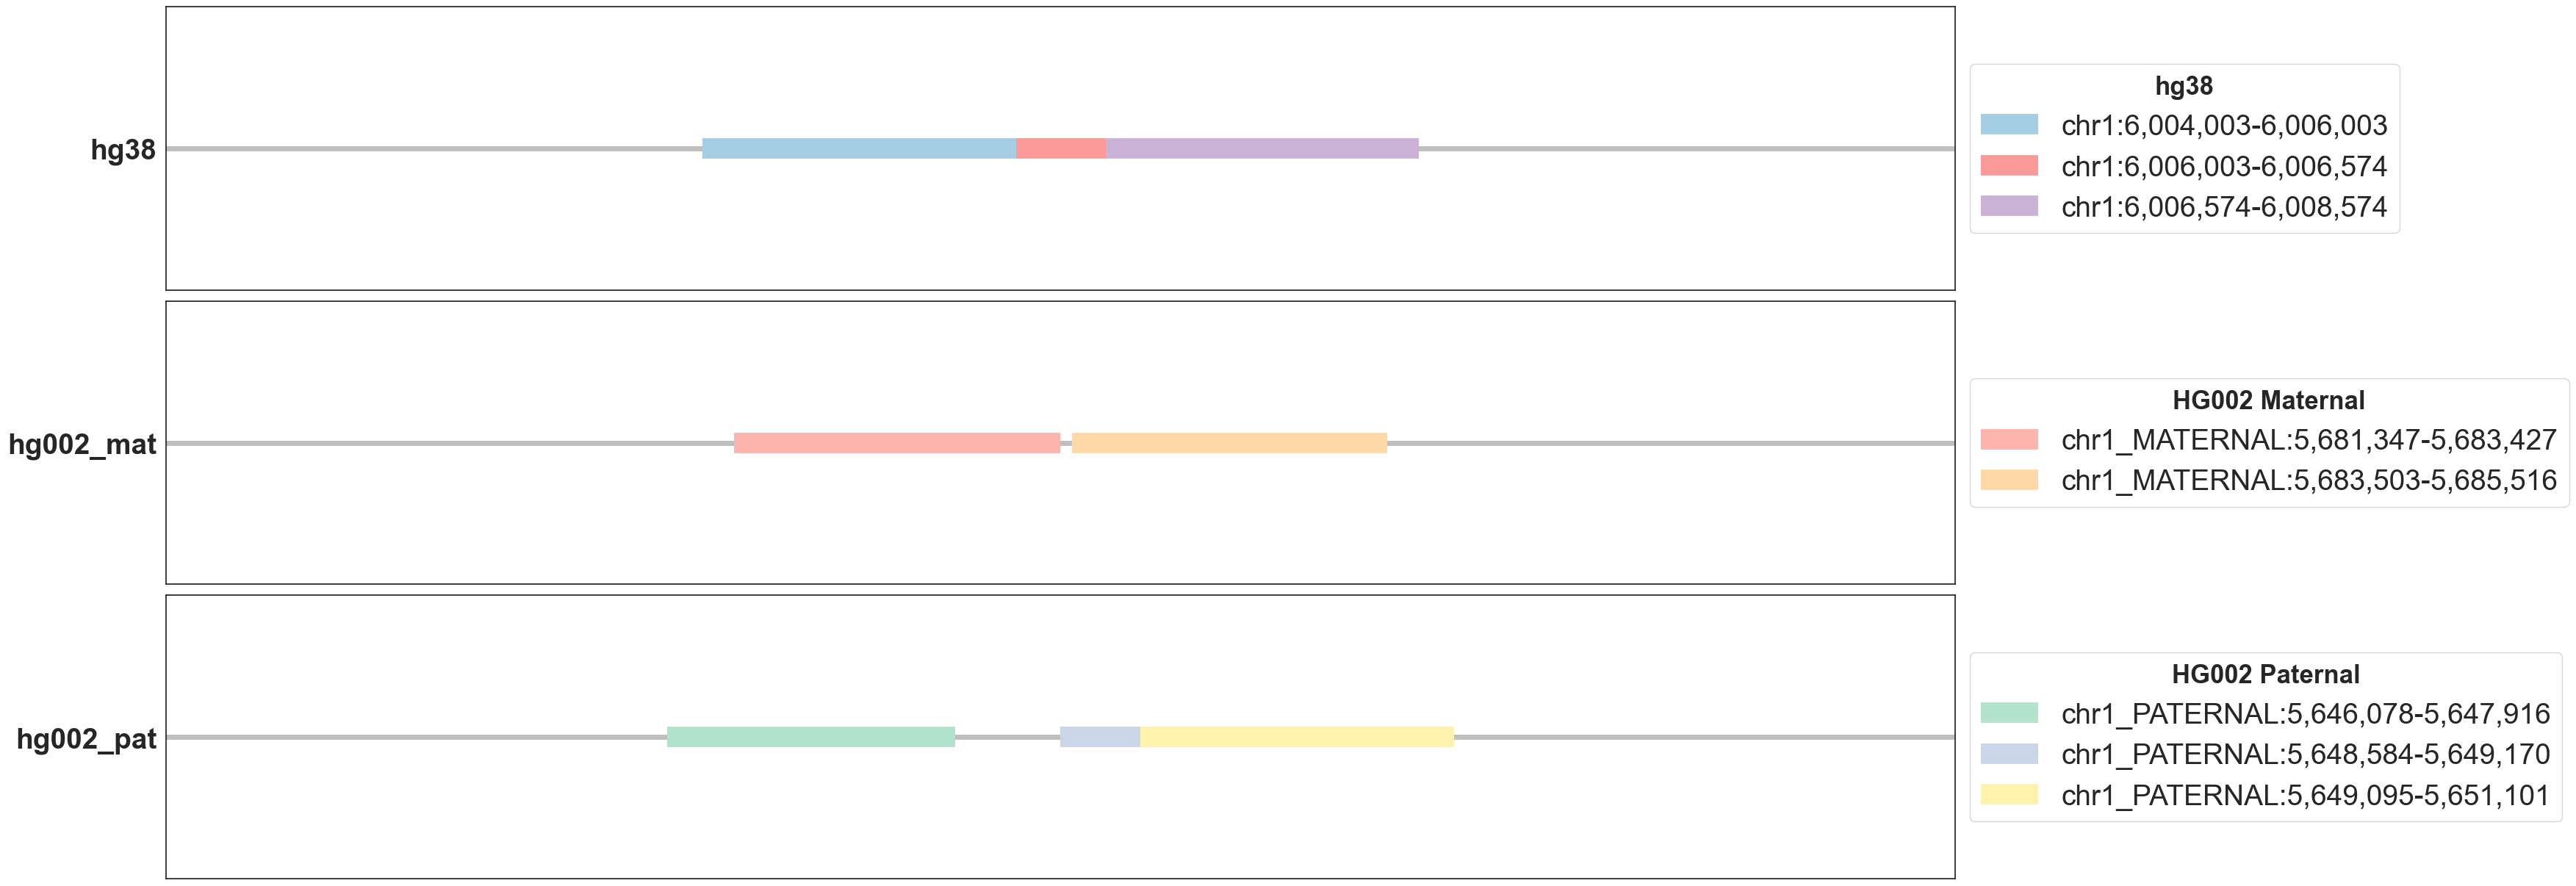

In [138]:
import T2T_ACE.alignment_visualization_utilities as avu
importlib.reload(avu)
avu.PlotIntervals(['chr1:6006003-6006574',
  'chr1:6004003-6006003',
  'chr1:6006574-6008574'], ['chr1_PATERNAL:5646078-5647916',
  'chr1_MATERNAL:5681347-5683427',
  'chr1_PATERNAL:5649095-5651101',
  'chr1_MATERNAL:5683503-5685516','chr1_PATERNAL:5648584-5649170']).plot_intervals_comparison(flanking=False, save=True, savepath='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/', ratio=20)

DEL interval: chr1:108190708-108194629 3922
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 0
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:108188708-108190708, 2001, 1, 2
right flanking interval: chr1:108194629-108196629, 2001, 1, 2
********** Potential DEL **********
chr1_PATERNAL:108446062-108448057 (1996bp), chr1_PATERNAL:108448074-108450074 (2001bp), 16
********** Potential DEL **********
chr1_MATERNAL:108363328-108365323 (1996bp), chr1_MATERNAL:108365340-108367340 (2001bp), 16


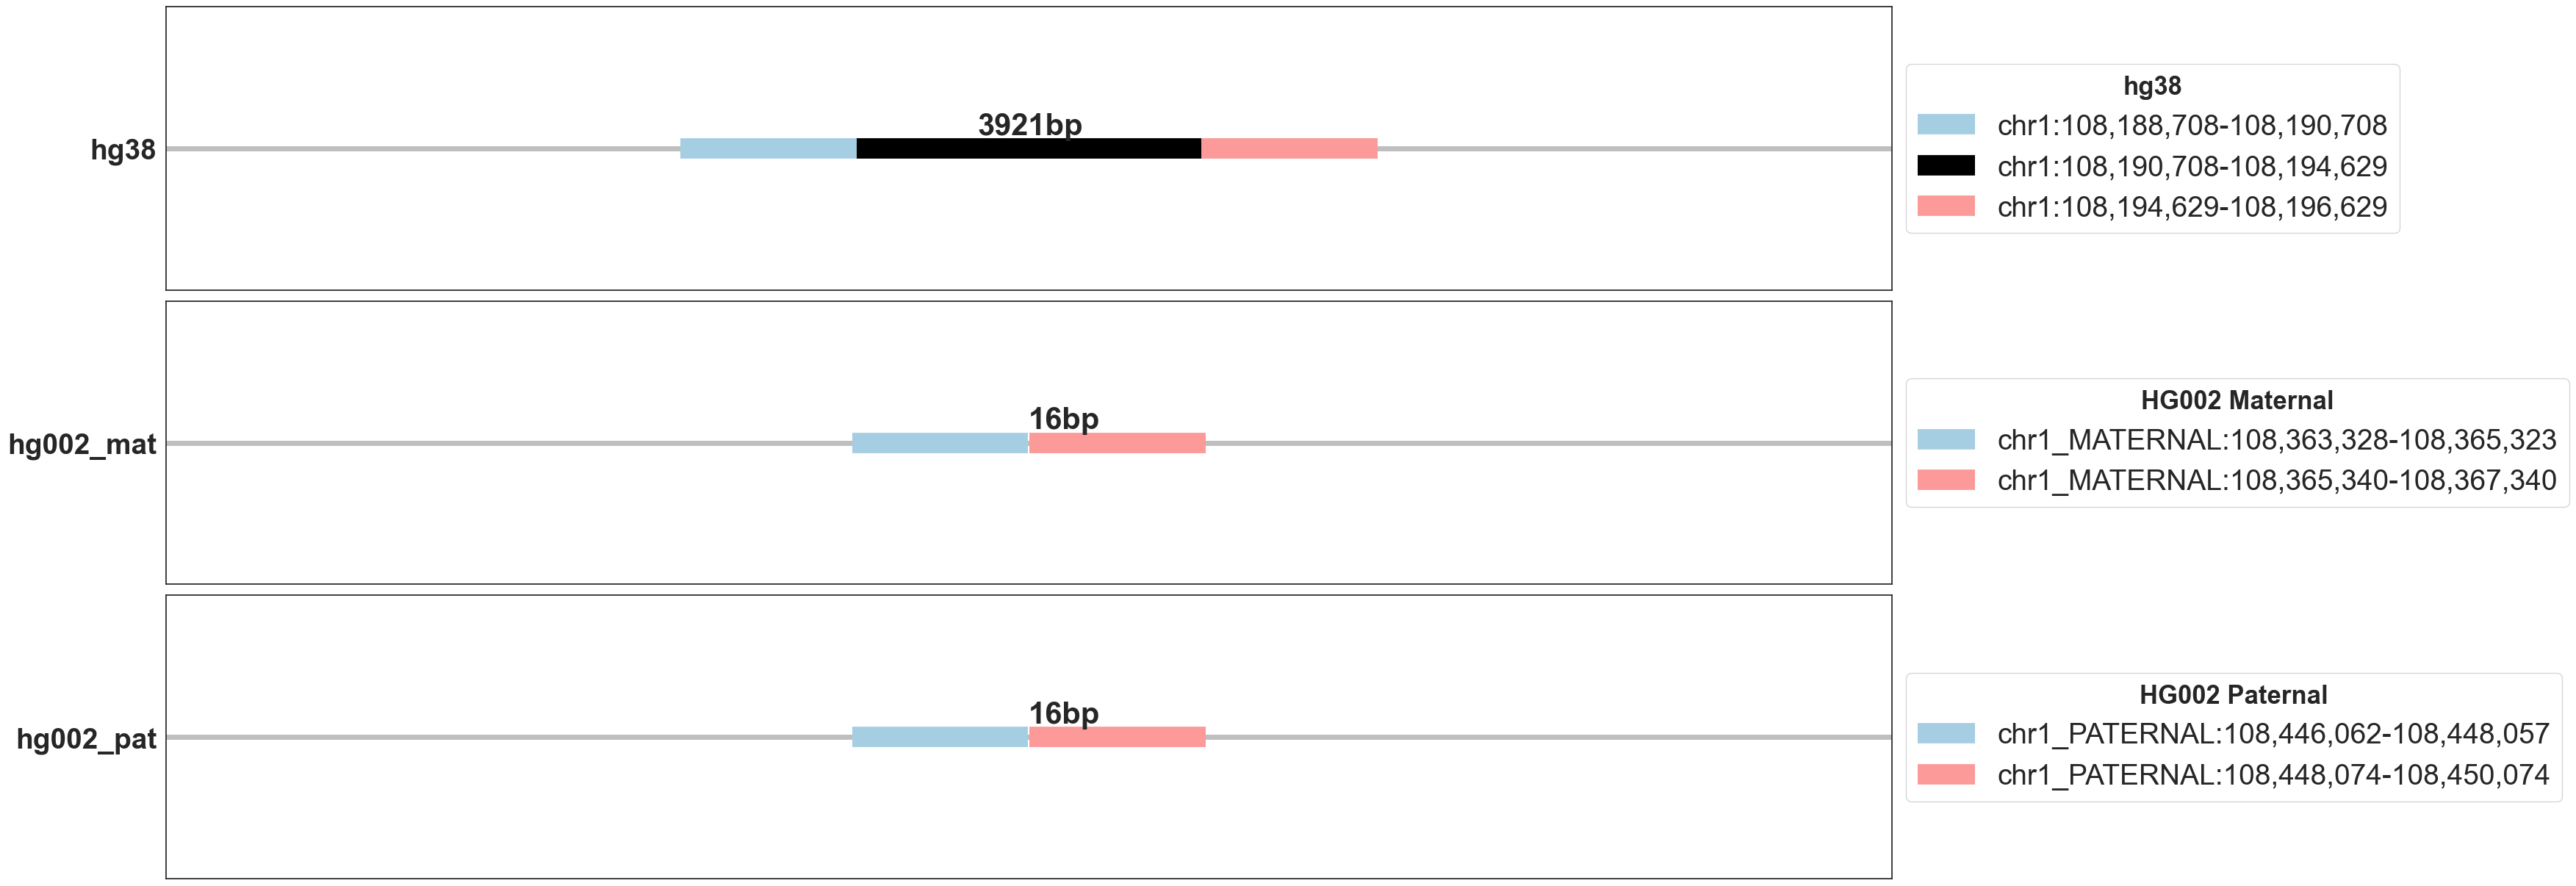

In [142]:
v.plot_del_flankings("chr1:108190708-108194629", ReferenceLocations.hg38, hg38, hg002t2t, plot_ratio=5, save_plot=True,save_plot_path='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/')

In [143]:
v.collect_del_flankings("chr16:34176544-34178323", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr16:34176544-34178323 1780
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr16:34174544-34176544, 2001, 1, 2
right flanking interval: chr16:34178323-34180323, 2001, 1, 2
----------- No DEL Evidence -----------
chr16_PATERNAL:34787523-34789524 (2002bp), chr16_PATERNAL:34791302-34793303 (2002bp), 1777
----------- No DEL Evidence -----------
chr16_MATERNAL:35988632-35990633 (2002bp), chr16_MATERNAL:35992411-35994412 (2002bp), 1777
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr16_PATERNAL:34789523-34791303; Interval Between HG2 Aligned Flankings:chr16_PATERNAL:34789525-34791301; Overlapping:(100.0, 99.78)
*DEL HG2 alignment:chr16_MATERNAL:35990632-35992412; Interval Between HG2 Aligned Flankings:chr16_MATERNAL:35990634-35992410; Overlapping:(100.0, 99.78)


{'del_interval': 'chr16:34176544-34178323',
 'del_interval_size': 1780,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr16:34174544-34176544',
 'right_flanking_interval': 'chr16:34178323-34180323',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [1777, 1777],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr16:34176544-34178323',
  'chr16:34174544-34176544',
  'chr16:34178323-34180323'],
 'hg2_plotting_flanking_intervals': ['chr16_PATERNAL:34787523-34789524',
  'chr16_MATERNAL:35988632-35990633',
  'chr16_PATERNAL:34791302-34793303',
  'chr16_MATERNAL:35992411-35994412'],
 'classification': 'False DEL',
 'minor_classification': 'False DEL'}

DEL interval: chr3:146667401-146677074 9674
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 0
flanking_size: 2902, copy_threshold: 2
left flanking interval: chr3:146664499-146667401, 2903, 1, 2
right flanking interval: chr3:146677074-146679976, 2903, 1, 2
********** Potential DEL **********
chr3_MATERNAL:149215354-149218257 (2904bp), chr3_MATERNAL:149223018-149225922 (2905bp), 4760
********** Potential DEL **********
chr3_PATERNAL:149635962-149638866 (2905bp), chr3_PATERNAL:149643631-149646533 (2903bp), 4764


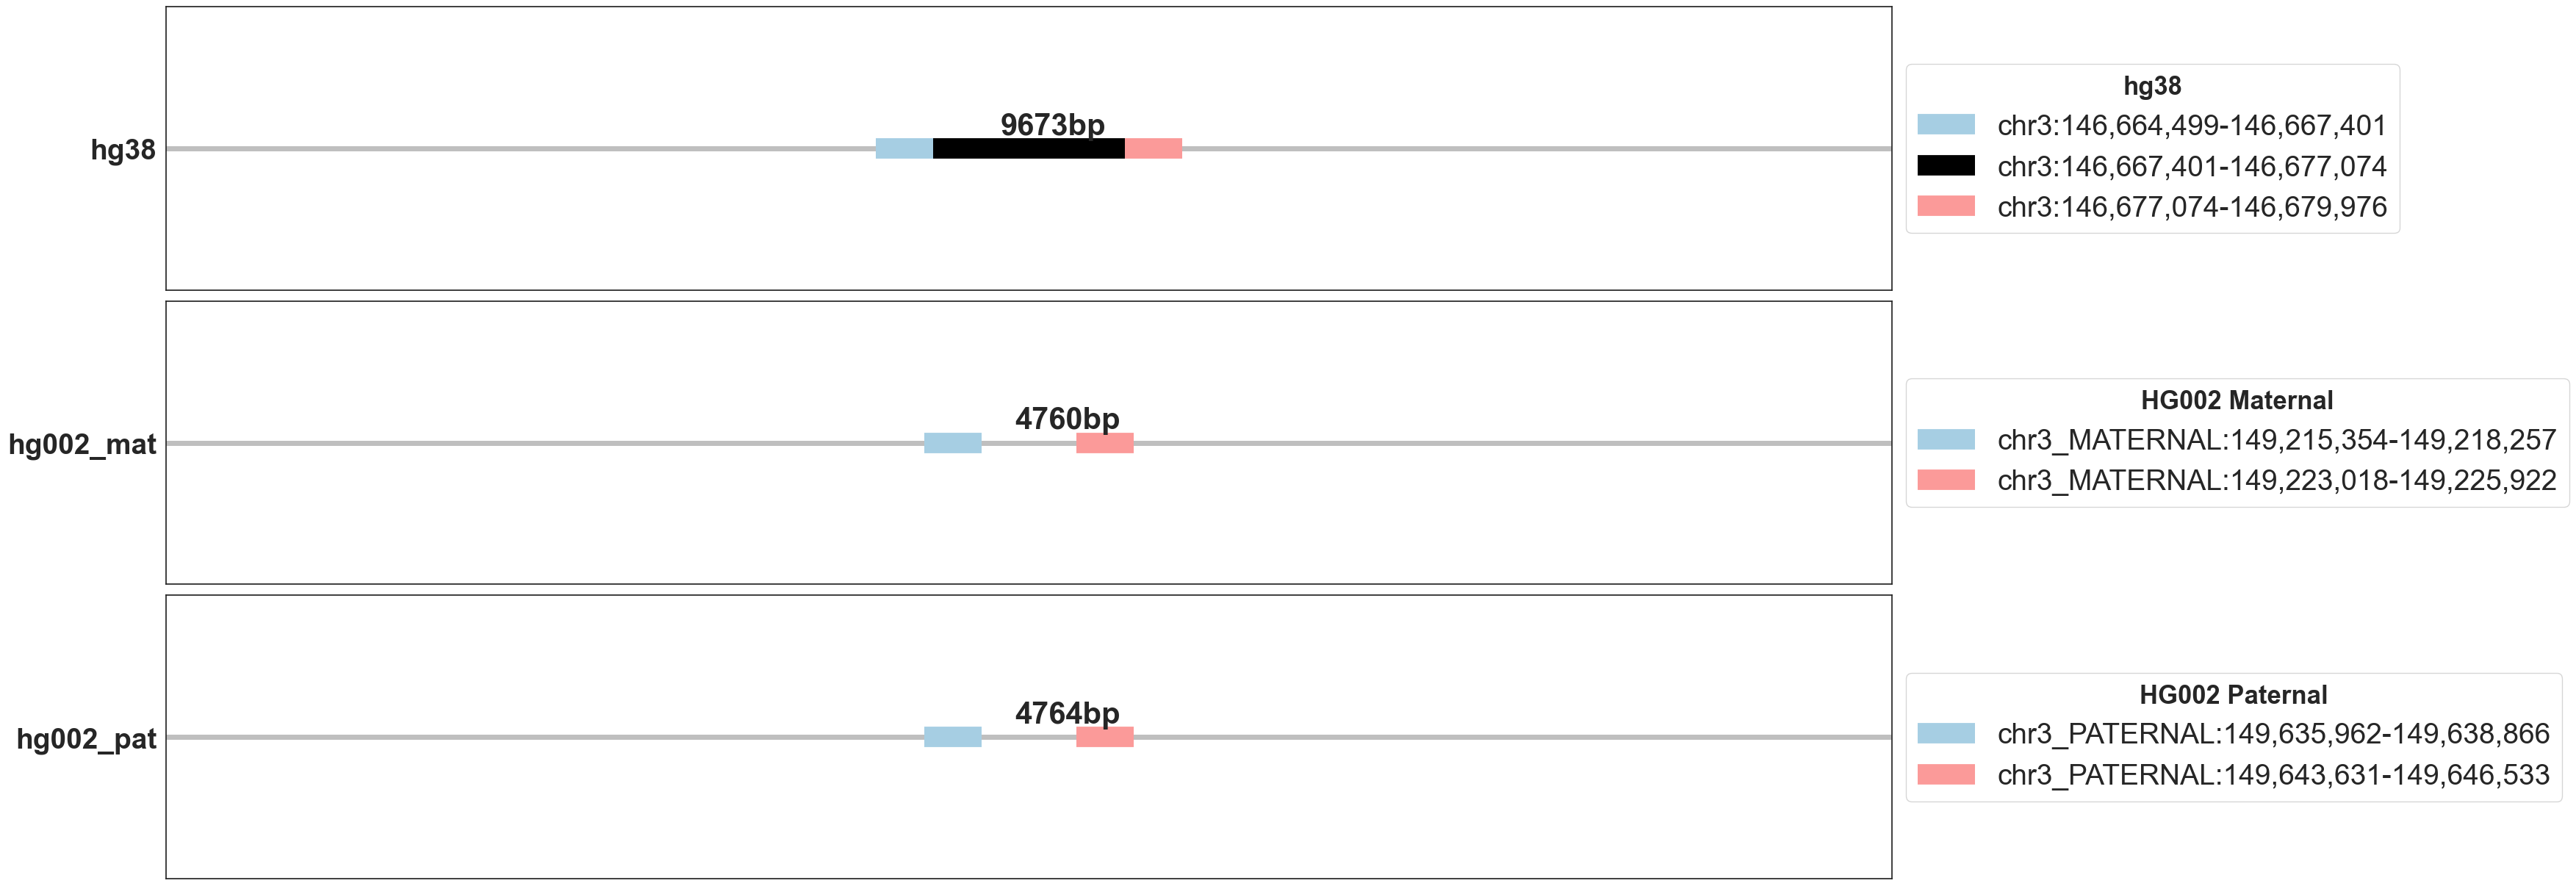

In [156]:
v.plot_del_flankings("chr3:146667401-146677074", ReferenceLocations.hg38, hg38, hg002t2t, plot_ratio=9, save_plot=False,save_plot_path='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/')